In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
RANDOM_STATE = 42

In [229]:
dataset1 = '2-wayEpi_100feat.txt'
dataset2 = '4-wayAdditive_100feat.txt'
dataset3 = '2Additive_2-wayEpi_100feat.txt'
dataset4 = '4-wayHeterogeneous_100feat.txt'

In [230]:
dataset = dataset1
df = pd.read_csv(dataset, sep='\t')

In [231]:
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [232]:
# Splitting the data into features and target
features = [feature for feature in df.columns if feature != 'Class']

In [233]:
# Split the data into training and test sets (Grid search uses cross-validation, so we don't split for validation set)
x_train, x_test, y_train, y_test = train_test_split(df[features], df['Class'], train_size=0.9, random_state=42)

In [234]:
# Use grid search to find the best hyperparameters
param_grid = {
    'max_depth': [2, 4, 8, 15, 20, 50],
    'n_estimators': [10, 20, 30, 100],
    'min_samples_split': [2, 10, 50, 100, 200]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")


Best hyperparameters: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 20}


Top 10 features:['N20' 'N5' 'N79' 'N44' 'N70' 'N2' 'N93' 'N25' 'N53' 'N88']


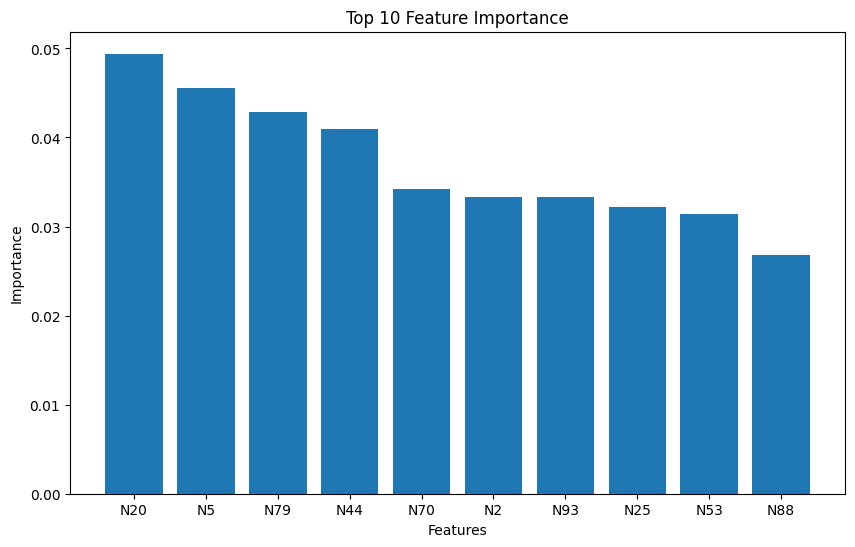

In [235]:
random_forest_model = RandomForestClassifier(n_estimators=100,
                                             min_samples_split=200,
                                             max_depth=2,
                                             random_state=RANDOM_STATE).fit(x_train, y_train)
# Print feature importance
featureImportance = random_forest_model.feature_importances_
# Print feature top 10 importance 
featureImportance = np.array(featureImportance)
features = np.array(features)
indices = np.argsort(featureImportance)[::-1]
featureImportance = featureImportance[indices]
features = features[indices]
print(f"Top 10 features:{features[:10]}")

# Plot feature importance of top 10 features
plt.figure(figsize=(10, 6))
plt.bar(features[:10], featureImportance[:10])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

In [236]:
print(f"Training accuracy score: {accuracy_score(grid_search.predict(x_train),y_train):.4f}\nTesting accuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Training accuracy score: 0.7344
Testing accuracy score: 0.4500


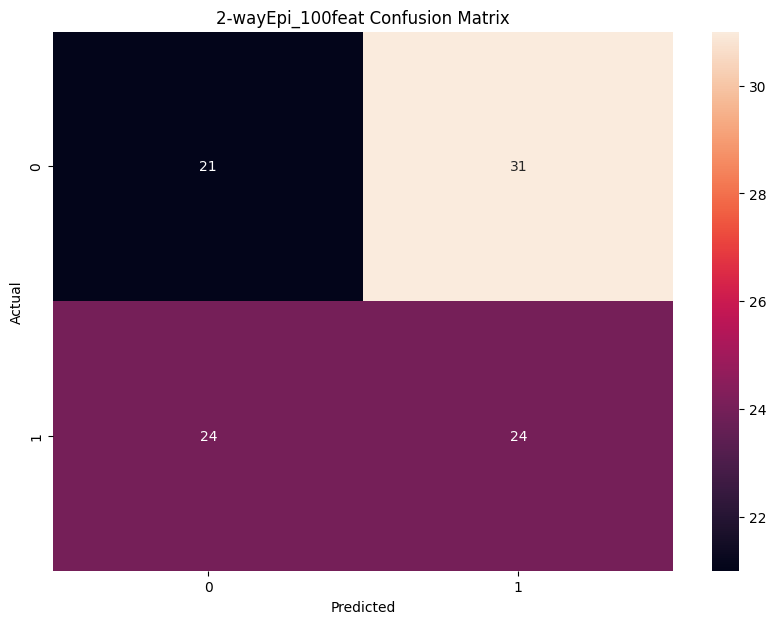

In [237]:
# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, random_forest_model.predict(x_test))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(dataset[:-4] + ' Confusion Matrix')
plt.show()


In [238]:
# Print the classification report
print(classification_report(y_test, random_forest_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.47      0.40      0.43        52
           1       0.44      0.50      0.47        48

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.45       100

